In [2]:
import os
import torch
from transformers import pipeline, AutoModelForSeq2SeqLM, AutoTokenizer

os.environ["CUDA_VISIBLE_DEVICES"] = "2"
device = torch.device("cuda:0")

prompt = "lego_absa"
answer = "lego_absa"
se_order = "aos"
model_path = "./output/GAS"

In [4]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

OSError: Incorrect path_or_model_id: './output/GAS'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
# Run inference
preds = model("The food was great, but the venue is just way too busy.")

In [2]:
# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1", use_fast = False)
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

In [3]:
# Load a traditional Sentiment Analysis model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path,
                          tokenizer=sentiment_model_path)

Device set to use cpu


In [13]:
sentence = "We had a great experience at the restaurant, food was delicious, but " \
  "the service was kinda bad"
print(f"Sentence: {sentence}")
print()

Sentence: We had a great experience at the restaurant, food was delicious, but the service was kinda bad



In [44]:
sentence = "feature nya membantu, aplikasi mudah digunakan dan mudah, tapi service nya kurang memuaskan"
print(f"Sentence: {sentence}")
print()

Sentence: feature nya membantu, aplikasi mudah digunakan dan mudah, tapi service nya kurang memuaskan



In [48]:
# ABSA of "feature"
aspect = "feature"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'food' is:
# Label negative: 0.0009989114478230476
# Label neutral: 0.001823813421651721
# Label positive: 0.997177243232727

Sentiment of aspect 'feature' is:
Label negative: 0.004709308966994286
Label neutral: 0.005240435246378183
Label positive: 0.9900503158569336



In [49]:
# ABSA of "service"
aspect = "service"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'service' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

Sentiment of aspect 'service' is:
Label negative: 0.9656919836997986
Label neutral: 0.004075923003256321
Label positive: 0.030232084915041924



In [50]:
# Overall sentiment of the sentence
sentiment = sentiment_model([sentence])[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")
# Overall sentiment: Negative with score 0.7706006765365601

Overall sentiment: negative with score 0.5701851844787598


In [42]:
import torch
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1", use_fast=False)
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# Load Traditional Sentiment Analysis Model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path, tokenizer=sentiment_model_path)

# Sentence to analyze
sentence = "feature nya membantu, aplikasi mudah digunakan dan mudah, tapi service nya kurang memuaskan"

# Aspects to analyze
aspects = ["feature", "service"]

# Store sentiment scores
aspect_sentiments = {}

for aspect in aspects:
    inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
    outputs = absa_model(**inputs)
    probs = F.softmax(outputs.logits, dim=1).detach().numpy()[0]

    # Store aspect sentiment
    aspect_sentiments[aspect] = {"negative": probs[0], "neutral": probs[1], "positive": probs[2]}

# Overall sentiment of the sentence
overall_sentiment = sentiment_model([sentence])[0]

# --- Visualization ---

# Highlighting Aspects in Text
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)

# Highlight words
highlighted_text = []
for token in doc:
    if token.text.lower() in aspects:
        highlighted_text.append(f"\033[92m{token.text}\033[0m")  # Green for important aspects
    else:
        highlighted_text.append(token.text)

# Print highlighted sentence
print("\nHighlighted Sentence with Aspects:\n")
print(" ".join(highlighted_text))

print(f"\nOverall Sentiment: {overall_sentiment['label']} with score {overall_sentiment['score']:.2f}")


Device set to use cpu



Highlighted Sentence with Aspects:

feature nya membantu , aplikasi mudah digunakan dan mudah , tapi service nya kurang memuaskan

Overall Sentiment: negative with score 0.57


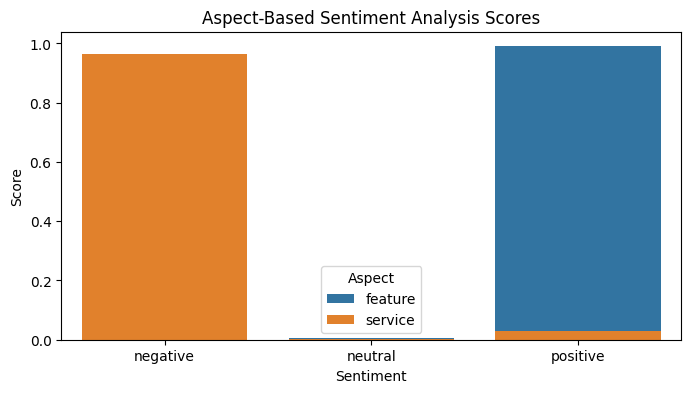


🔹 Word Importance Scores (Descending):
service: 1.0
dan: 0.893
nya: 0.858
membantu: 0.755
,: 0.73
mudah: 0.62
feature: 0.386
kurang: 0.219
memuaskan: 0.187
aplikasi: 0.161
digunakan: 0.06
tapi: 0.021


In [43]:
# Store sentiment scores
aspect_sentiments = {}
word_importance = {}

# Aspect-Based Sentiment Analysis
for aspect in aspects:
    inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
    outputs = absa_model(**inputs)
    probs = F.softmax(outputs.logits, dim=1).detach().numpy()[0]
    
    # Store aspect sentiment
    aspect_sentiments[aspect] = {"negative": probs[0], "neutral": probs[1], "positive": probs[2]}

# Traditional Sentiment Analysis for Overall Sentiment
overall_sentiment = sentiment_model([sentence])[0]

# Word Importance Calculation
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)

# Dummy importance scores (replace with real ones, e.g., SHAP, Attention weights)
np.random.seed(42)
for token in doc:
    word_importance[token.text] = np.random.rand()  # Random importance (0 to 1)

# Normalize importance values (0 to 1)
max_importance = max(word_importance.values()) if word_importance else 1
word_importance = {word: round(score / max_importance, 3) for word, score in word_importance.items()}

# Sort words by importance (descending)
sorted_importance = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)

# --- 🔹 **Visualization** 🔹 ---
# Bar Chart for Aspect Sentiment Scores
plt.figure(figsize=(8, 4))
for aspect, scores in aspect_sentiments.items():
    sns.barplot(x=list(scores.keys()), y=list(scores.values()), label=aspect)

plt.xlabel("Sentiment")
plt.ylabel("Score")
plt.title("Aspect-Based Sentiment Analysis Scores")
plt.legend(title="Aspect")
plt.show()

# Print Word Importance Scores
print("\n🔹 Word Importance Scores (Descending):")
for word, score in sorted_importance:
    print(f"{word}: {score}")